# Report on the proposed modifications to the Genetic Algorithm
Sabaev G.A.

Code used for testing and the algorithm implementations: https://github.com/GeorgySabaev/GenEngAlg

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

## Algorithms and test groups

### Algorithms (solvers):
 - GA - Standard GA
 - GEA1 - GA with controlled mutation
 - GEA2 - GA with controlled crossover
 - GEA3 - GA with gene insertion
 - GEA - GA with all three Engineering modifications
 
 ### Test groups (tests):
 - 1_small - Small test, 200 items weighted from 1 to 100, capacity is 50% of the theoretical maximum
 - 2_low_bar - Small test, but capacity is 30% of the theoretical maximum
 - 3_high_bar - Small test, but capacity is 80% of the theoretical maximum (effectively no cap in most cases)
 - 4_large - Large test, 1000 items weighted from 1 to 100, capacity is 50% of the theoretical maximum
 - 5_heavy_spread - Small test, but item weights are nonlinear with occasional large items (up to 100000)

In [5]:
table = [None] * 5
averages = [None] * 5
medians = [None] * 5
solverNames = ["GA", "GEA1", "GEA2", "GEA3", "GEA"]
testNames = ["1_small", "2_low_bar", "3_high_bar", "4_large", "5_heavy_spread"]
iterationCounts = [200, 200, 200, 200, 200]

## Reading data

In [6]:
for test in range(len(testNames)):
    table[test] = [None] * 5
    for solver in range(len(solverNames)):
        table[test][solver] = pd.read_csv(f"output/{testNames[test]}_{solverNames[solver]}.csv", names=[i for i in range(iterationCounts[test])])
        print(f"{testNames[test]}_{solverNames[solver]}.csv")
        display(table[test][solver])

1_small_GA.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5884,5906,5906,6317,6317,6699,6842,6842,6842,6948,...,8895,8895,8895,8895,8895,8895,8895,8895,8895,8895
1,5940,5940,5941,5941,6029,6261,6343,6390,6489,6625,...,8969,8969,8969,8969,8969,8969,8969,8969,8969,8969
2,5755,5755,5833,5967,6352,6352,6384,6860,6860,6860,...,8318,8318,8318,8318,8318,8318,8318,8318,8318,8318
3,5775,5797,6175,6270,6310,6328,6372,6424,6680,6925,...,9058,9058,9058,9058,9058,9058,9058,9058,9058,9058
4,6073,6156,6156,6156,6595,6655,6655,6669,6669,6831,...,8960,8960,8960,8960,8960,8960,8960,8960,8960,8960
5,6209,6209,6209,6288,6288,6540,6540,6750,6750,6873,...,8738,8738,8738,8738,8738,8738,8738,8738,8738,8738
6,5988,6361,6361,6447,6540,6540,6540,6644,6795,6840,...,8855,8855,8855,8855,8855,8855,8855,8855,8855,8855
7,5722,5825,5936,6197,6255,6533,6533,6699,6718,6718,...,8861,8861,8861,8861,8861,8861,8861,8861,8861,8861
8,5797,5801,5961,5961,5997,6192,6215,6453,6573,6629,...,9135,9135,9135,9135,9135,9135,9135,9135,9135,9135
9,5914,6021,6021,6145,6478,6486,6514,6538,6666,6966,...,8847,8847,8847,8847,8847,8847,8847,8847,8847,8847


1_small_GEA1.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5684,5824,6044,6277,6277,6330,6376,6614,6614,6614,...,9352,9352,9352,9352,9358,9358,9358,9358,9358,9364
1,6023,6023,6067,6361,6361,6384,6384,6558,6558,6630,...,9369,9369,9369,9369,9369,9369,9369,9369,9369,9369
2,5755,5757,5899,6052,6248,6299,6489,6548,6602,6696,...,9347,9349,9349,9355,9357,9357,9357,9357,9357,9357
3,5857,5857,6106,6185,6203,6337,6445,6531,6692,6692,...,9365,9365,9365,9367,9367,9367,9367,9367,9367,9367
4,5759,5896,6048,6048,6088,6094,6211,6275,6555,6555,...,9369,9369,9369,9369,9369,9369,9369,9369,9369,9369
5,6019,6019,6341,6341,6341,6398,6570,6591,6591,6627,...,9365,9365,9365,9365,9365,9365,9366,9366,9366,9366
6,5958,5958,5996,6106,6257,6388,6464,6473,6508,6508,...,9369,9369,9369,9369,9369,9369,9369,9369,9369,9369
7,5838,5838,6124,6161,6196,6362,6362,6488,6488,6792,...,9340,9344,9344,9344,9344,9344,9344,9344,9344,9347
8,5884,6070,6169,6169,6169,6169,6206,6378,6378,6402,...,9363,9364,9366,9366,9366,9366,9366,9366,9366,9369
9,6107,6118,6118,6337,6373,6373,6536,6536,6536,6555,...,9369,9369,9369,9369,9369,9369,9369,9369,9369,9369


1_small_GEA2.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,6088,6242,6417,6449,6449,6559,6559,6642,6642,6642,...,8047,8047,8047,8047,8047,8047,8047,8047,8047,8047
1,5848,6064,6178,6178,6275,6339,6708,6708,6708,6708,...,8404,8404,8404,8404,8404,8404,8404,8404,8404,8404
2,5759,5992,6188,6234,6321,6486,6596,6596,6722,6722,...,8023,8023,8023,8023,8023,8023,8023,8023,8023,8023
3,6002,6462,6462,6487,6497,6497,6501,6534,6627,6722,...,8081,8081,8081,8081,8081,8081,8081,8081,8081,8081
4,6366,6713,6713,6713,6713,6713,6914,6991,6991,6991,...,7595,7595,7595,7595,7595,7595,7595,7595,7595,7595
5,5986,6005,6060,6145,6216,6247,6321,6440,6562,6685,...,8236,8236,8236,8236,8236,8236,8236,8236,8236,8236
6,6199,6403,6403,6489,6489,6489,6534,6692,6692,6692,...,8339,8339,8339,8339,8339,8339,8339,8339,8339,8339
7,5910,6248,6248,6382,6429,6429,6507,6507,6530,6583,...,8111,8111,8111,8111,8111,8111,8111,8111,8111,8111
8,5904,5988,6235,6271,6284,6393,6421,6575,6663,6756,...,7759,7759,7759,7759,7759,7759,7759,7759,7759,7759
9,5996,6243,6275,6446,6456,6456,6460,6510,6729,6729,...,8453,8453,8453,8453,8453,8453,8453,8453,8453,8453


1_small_GEA3.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5767,5849,5896,5896,6023,6023,6023,6058,6058,6058,...,8082,8082,8082,8082,8082,8082,8082,8082,8082,8082
1,5698,6000,6037,6044,6217,6429,6429,6429,6461,6461,...,7603,7603,7603,7603,7603,7603,7603,7603,7603,7603
2,5938,5969,5969,5969,6063,6063,6063,6088,6207,6299,...,7761,7761,7761,7761,7761,7761,7761,7761,7761,7761
3,5831,5831,5908,5908,5908,5908,5993,5993,6125,6125,...,7607,7607,7607,7607,7607,7607,7607,7607,7607,7607
4,6024,6086,6160,6160,6160,6160,6160,6284,6423,6460,...,7241,7241,7241,7241,7241,7241,7241,7241,7241,7241
5,5702,5838,5965,5965,6242,6242,6242,6242,6304,6353,...,7884,7884,7884,7884,7884,7884,7884,7884,7884,7884
6,5841,5841,5965,5965,5965,6031,6196,6196,6196,6260,...,8093,8093,8093,8093,8093,8093,8093,8093,8093,8093
7,5754,5893,6036,6036,6036,6077,6081,6120,6120,6120,...,7929,7929,7929,7929,7929,7929,7929,7929,7929,7929
8,6219,6219,6246,6246,6246,6299,6299,6300,6338,6344,...,8295,8295,8295,8295,8295,8295,8295,8295,8295,8295
9,5753,5753,6104,6104,6174,6174,6174,6174,6174,6174,...,7729,7729,7729,7729,7729,7729,7729,7729,7729,7729


1_small_GEA.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5785,5949,5949,5981,6131,6157,6160,6160,6265,6347,...,9141,9141,9141,9141,9141,9141,9141,9141,9141,9141
1,5853,5996,6078,6154,6154,6154,6272,6272,6393,6393,...,9225,9248,9248,9266,9266,9266,9266,9266,9266,9266
2,5989,6064,6064,6169,6169,6169,6169,6312,6312,6326,...,9288,9288,9288,9288,9288,9288,9288,9290,9290,9290
3,5729,6047,6129,6129,6129,6129,6285,6306,6306,6306,...,9154,9154,9154,9154,9154,9182,9182,9196,9196,9197
4,6114,6226,6226,6241,6256,6256,6370,6388,6460,6460,...,9301,9301,9301,9301,9301,9301,9301,9304,9304,9304
5,5896,6012,6069,6113,6162,6218,6223,6223,6496,6613,...,9316,9316,9316,9316,9316,9316,9316,9316,9329,9329
6,5883,5975,6140,6199,6299,6299,6425,6425,6476,6637,...,9317,9317,9334,9334,9334,9335,9335,9335,9335,9349
7,6450,6450,6483,6483,6483,6483,6483,6483,6483,6483,...,9058,9082,9082,9082,9082,9082,9084,9098,9098,9105
8,6031,6031,6094,6161,6161,6333,6333,6356,6571,6721,...,9293,9293,9293,9302,9303,9303,9303,9308,9308,9308
9,5860,6205,6205,6205,6205,6391,6404,6404,6404,6560,...,9347,9347,9347,9347,9353,9353,9353,9353,9355,9355


2_low_bar_GA.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5997,5997,5999,5999,5999,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
1,5977,5977,5977,5997,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
2,5930,5975,5980,5980,5998,5998,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
3,5975,5994,5996,5997,5997,5997,5999,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
4,5953,5953,5993,5999,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
5,5972,5994,5994,5994,5997,5997,5997,5997,5998,5999,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
6,5946,5946,5992,5995,5995,5995,5999,5999,5999,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
7,5975,5975,5995,5996,5996,5999,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
8,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
9,5991,5991,5998,5998,5998,5999,5999,5999,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000


2_low_bar_GEA1.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5978,5993,5994,5994,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
1,5949,5974,5985,5985,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
2,5997,5997,5997,5997,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
3,5997,5997,5997,5997,5997,5997,5998,5998,5998,5998,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
4,5996,5996,5996,5996,5996,5999,5999,5999,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
5,5995,5995,5999,5999,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
6,5991,5993,5993,5993,5998,5998,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
7,5997,5997,5997,5997,5997,5997,5997,5997,5997,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
8,5980,5980,5980,5991,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
9,5993,5993,5993,5993,5994,5999,5999,5999,5999,5999,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000


2_low_bar_GEA2.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
1,5997,5997,5998,5998,5998,5998,5998,5998,5998,5998,...,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998
2,5999,5999,5999,5999,5999,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
3,5994,5994,5999,5999,5999,5999,5999,5999,5999,5999,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
4,5999,5999,5999,5999,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
5,5992,5992,5994,5994,5995,5995,5999,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
6,5954,5994,5997,5997,5997,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
7,5994,5995,5995,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
8,5975,5997,5997,5998,5998,5998,5999,5999,5999,5999,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
9,5997,5997,5997,5997,5999,5999,5999,5999,5999,5999,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000


2_low_bar_GEA3.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5964,5989,5989,5989,5989,5989,5989,5989,5989,5996,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
1,5933,5971,5971,5971,5971,5971,5971,5971,5971,5984,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
2,5974,5974,5982,5982,5983,5983,5983,5983,5983,5983,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
3,5991,5991,5991,5991,5996,5996,5996,5996,5996,5997,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
4,5992,5992,5992,5994,5994,5994,5994,5994,5998,5998,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
5,5977,5977,5977,5977,5977,5977,5977,5977,5977,5977,...,5977,5977,5977,5977,5977,5977,5977,5977,5977,5977
6,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,...,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998
7,5895,5988,5997,5997,5997,5997,5997,5997,5997,5997,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
8,5995,5999,5999,5999,5999,5999,5999,5999,5999,5999,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
9,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998,...,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998


2_low_bar_GEA.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5988,5999,5999,5999,5999,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
1,5984,5998,5998,5998,5998,5998,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
2,5990,6000,6000,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
3,5990,5990,5991,5997,5997,5997,5997,5997,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
4,5994,5994,5994,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
5,5965,5965,5968,5975,5994,5994,5998,5998,5998,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
6,5989,5989,5989,5989,5995,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
7,5990,5991,5991,5997,5999,5999,5999,5999,5999,5999,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
8,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
9,5982,5982,5996,6000,6000,6000,6000,6000,6000,6000,...,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000


3_high_bar_GA.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,6013,6028,6028,6114,6561,6561,6569,6648,6881,6881,...,9277,9277,9277,9277,9277,9277,9277,9277,9277,9277
1,5994,6098,6649,6649,6649,6688,6688,6688,6875,7131,...,9344,9344,9344,9344,9344,9344,9344,9344,9344,9344
2,6255,6255,6326,6434,6758,6758,6807,6828,6923,7080,...,9087,9087,9087,9087,9087,9087,9087,9087,9087,9087
3,5936,6001,6106,6320,6320,6320,6505,6714,6714,6872,...,8919,8919,8919,8919,8919,8919,8919,8919,8919,8919
4,6314,6314,6314,6482,6482,6562,6667,6807,6839,6920,...,9008,9008,9008,9008,9008,9008,9008,9008,9008,9008
5,5987,6025,6163,6432,6438,6533,6942,7023,7425,7482,...,8944,8944,8944,8944,8944,8944,8944,8944,8944,8944
6,6246,6246,6369,6413,6416,6524,6674,6678,6747,6923,...,9142,9142,9142,9142,9142,9142,9142,9142,9142,9142
7,6134,6134,6420,6504,6504,6536,6837,6890,6890,6920,...,8964,8964,8964,8964,8964,8964,8964,8964,8964,8964
8,6236,6376,6376,6459,6459,6548,6733,6861,6895,7274,...,9077,9077,9077,9077,9077,9077,9077,9077,9077,9077
9,6280,6280,6280,6370,6516,6868,6868,6924,7315,7316,...,8915,8915,8915,8915,8915,8915,8915,8915,8915,8915


3_high_bar_GEA1.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5967,5967,6118,6217,6463,6521,6599,6599,6722,6722,...,9666,9666,9666,9666,9666,9666,9666,9666,9666,9666
1,6081,6187,6187,6410,6442,6542,6616,6616,6726,6833,...,9663,9663,9663,9663,9663,9664,9666,9666,9666,9666
2,6223,6223,6254,6254,6272,6412,6412,6504,6589,6652,...,9623,9628,9628,9628,9633,9633,9633,9638,9638,9638
3,5958,6149,6149,6160,6314,6325,6424,6424,6817,6817,...,9651,9651,9651,9651,9655,9655,9655,9655,9655,9659
4,6304,6304,6436,6528,6528,6528,6655,6690,6752,7039,...,9648,9648,9649,9649,9649,9649,9652,9652,9652,9653
5,5981,6087,6207,6244,6397,6477,6588,6607,6613,6686,...,9633,9633,9639,9639,9639,9642,9642,9642,9647,9647
6,5968,6068,6167,6305,6305,6621,6621,6621,6625,7186,...,9666,9666,9666,9666,9666,9666,9666,9666,9666,9666
7,5924,6059,6081,6174,6498,6569,6569,6611,6707,6808,...,9650,9650,9650,9650,9650,9650,9655,9655,9655,9655
8,5926,5991,6061,6094,6210,6303,6432,6432,6457,6761,...,9658,9658,9658,9659,9659,9659,9659,9659,9659,9659
9,6013,6093,6098,6366,6431,6464,6553,6553,6579,6690,...,9622,9622,9624,9624,9637,9637,9637,9637,9637,9644


3_high_bar_GEA2.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,6670,6724,6907,7047,7103,7103,7103,7181,7194,7196,...,8608,8608,8608,8608,8608,8608,8608,8608,8608,8608
1,6101,6383,6451,6485,6597,6748,6839,6858,6921,7140,...,8578,8578,8578,8578,8578,8578,8578,8578,8578,8578
2,6270,6506,6637,6736,6891,6891,6891,6891,6891,6969,...,8210,8210,8210,8210,8210,8210,8210,8210,8210,8210
3,6241,6535,6582,6698,6698,6787,6828,6837,6995,6995,...,8220,8220,8220,8220,8220,8220,8220,8220,8220,8220
4,5923,6003,6147,6436,6509,6509,6578,6675,6675,6723,...,8817,8817,8817,8817,8817,8817,8817,8817,8817,8817
5,6032,6461,6491,6492,6714,6714,6774,6838,6850,6850,...,8370,8370,8370,8370,8370,8370,8370,8370,8370,8370
6,6344,6462,6583,6598,6790,6817,6817,6817,6817,6874,...,8118,8118,8118,8118,8118,8118,8118,8118,8118,8118
7,6246,6518,6518,6628,6739,6886,7084,7084,7326,7522,...,8323,8323,8323,8323,8323,8323,8323,8323,8323,8323
8,6266,6530,6530,6620,6710,6798,6853,6884,6973,6973,...,8341,8341,8341,8341,8341,8341,8341,8341,8341,8341
9,6079,6257,6445,6445,6493,6926,6926,6926,6926,6952,...,8442,8442,8442,8442,8442,8442,8442,8442,8442,8442


3_high_bar_GEA3.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5869,6071,6071,6071,6071,6071,6140,6572,6572,6577,...,7726,7726,7726,7726,7726,7726,7726,7726,7726,7726
1,5953,6311,6311,6311,6311,6311,6546,6546,6546,6611,...,7526,7526,7526,7526,7526,7526,7526,7526,7526,7526
2,6230,6407,6407,6407,6407,6407,6407,6407,6478,6478,...,6974,6974,6974,6974,6974,6974,6974,6974,6974,6974
3,5894,6263,6281,6281,6368,6478,6478,6478,6478,6494,...,7926,7926,7926,7926,7926,7926,7926,7926,7926,7926
4,5975,6227,6307,6391,6391,6402,6486,6509,6509,6675,...,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294
5,6425,6480,6480,6480,6480,6505,6505,6505,6562,6562,...,7835,7835,7835,7835,7835,7835,7835,7835,7835,7835
6,6048,6375,6375,6375,6375,6665,6665,6665,6665,6793,...,8338,8338,8338,8338,8338,8338,8338,8338,8338,8338
7,5818,5892,6062,6062,6108,6201,6205,6339,6339,6339,...,7830,7830,7830,7830,7830,7830,7830,7830,7830,7830
8,5958,6246,6246,6603,6603,6603,6603,6649,6649,6789,...,8078,8078,8078,8078,8078,8078,8078,8078,8078,8078
9,6034,6303,6303,6478,6478,6478,6494,6581,6618,6903,...,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807


3_high_bar_GEA.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,5888,6294,6294,6433,6433,6582,6582,6582,6703,6703,...,9565,9565,9566,9566,9566,9584,9587,9587,9587,9599
1,6189,6354,6355,6417,6420,6436,6452,6495,6603,6619,...,9428,9438,9455,9455,9467,9467,9467,9480,9480,9487
2,6321,6553,6553,6553,6553,6720,6720,6766,6784,6834,...,9422,9422,9455,9455,9455,9457,9457,9473,9473,9485
3,6330,6463,6463,6499,6753,6753,6753,6753,6762,6762,...,9388,9416,9416,9416,9416,9416,9436,9436,9449,9449
4,6005,6140,6155,6356,6442,6452,6452,6702,6702,6702,...,9360,9360,9360,9360,9360,9360,9360,9360,9376,9376
5,6178,6268,6268,6306,6464,6464,6464,6469,6721,6905,...,9536,9536,9536,9536,9536,9536,9541,9541,9541,9543
6,6200,6296,6296,6296,6419,6428,6437,6437,6551,6551,...,9330,9337,9342,9342,9347,9347,9352,9352,9365,9370
7,6070,6226,6259,6275,6337,6337,6373,6390,6531,6531,...,9233,9249,9255,9255,9255,9255,9255,9255,9259,9284
8,6245,6267,6267,6462,6462,6462,6593,6593,6593,6676,...,9479,9479,9479,9479,9479,9479,9479,9479,9497,9497
9,6359,6359,6532,6618,6618,6691,6691,6691,6721,6730,...,9498,9502,9502,9517,9517,9517,9521,9553,9553,9553


4_large_GA.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,27392,27811,27994,28230,28520,29099,29099,29099,29560,29574,...,38666,38666,38666,38666,38666,38666,38666,38666,38666,38666
1,27847,27919,28279,28676,28676,28973,29241,29328,29579,29581,...,37008,37008,37008,37008,37008,37008,37008,37008,37008,37008
2,28490,28638,29248,29248,29398,29575,29755,29755,30480,30539,...,37131,37131,37131,37131,37131,37131,37131,37131,37131,37131
3,27986,28011,28153,28622,28622,28826,28886,29809,29915,30034,...,37414,37414,37414,37414,37414,37414,37414,37414,37414,37414
4,27881,27881,28471,28681,29338,29338,29338,29365,29387,30237,...,38084,38084,38084,38084,38084,38084,38084,38084,38084,38084


4_large_GEA1.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,27927,27927,28194,28462,28885,29274,29299,29537,29537,29537,...,41598,41598,41598,41598,41598,41640,41686,41686,41894,41905
1,27838,27838,28269,28561,28955,28957,29363,29443,29960,30091,...,40913,40913,40977,40977,40977,41003,41008,41137,41137,41138
2,28692,28791,28791,28924,29249,29249,29249,29432,29643,29708,...,41224,41224,41224,41224,41224,41236,41236,41259,41259,41401
3,27884,28492,29034,29034,29034,29034,29034,29365,29527,29557,...,40701,40707,40721,40759,40844,40874,40907,40907,40907,40911
4,27299,28388,28434,28439,28478,28478,29109,29109,29789,29847,...,40244,40244,40310,40315,40337,40379,40379,40379,40379,40399


4_large_GEA2.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,27683,28490,28490,28896,29187,29256,29259,29952,29952,29952,...,34825,34825,34825,34825,34825,34825,34825,34825,34825,34825
1,27824,28074,28074,28499,28592,28873,28987,29411,29552,30181,...,35974,35974,35974,35974,35974,35974,35974,35974,35974,35974
2,27905,28159,28937,28937,29188,29188,29290,29290,29684,29684,...,34229,34229,34229,34229,34229,34229,34229,34229,34229,34229
3,28504,28947,28949,29597,29597,29605,29605,29938,29938,29938,...,33999,33999,33999,33999,33999,33999,33999,33999,33999,33999
4,28128,28663,28665,28699,29045,29177,29177,29260,29321,29355,...,43915,43915,44096,44198,44201,44325,44553,44642,44743,44789


4_large_GEA3.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,28668,28668,28968,28972,29271,29271,29329,29329,29329,29329,...,42733,42733,42733,42733,42733,42733,42733,42733,42733,42733
1,27938,27938,27938,27938,27938,27938,27938,27938,27938,27938,...,32594,32594,32594,32594,32594,32594,32594,32594,32594,32594
2,27644,28237,28360,28360,28360,28640,28640,28767,29530,29530,...,34111,34111,34111,34111,34111,34111,34111,34111,34111,34111
3,28126,28126,28126,28126,28126,28154,28616,28616,28616,28616,...,34254,34254,34254,34254,34254,34254,34254,34254,34254,34254
4,27333,27606,28063,28596,28596,28680,28680,28680,28680,30070,...,35976,35976,35976,35976,35976,35976,35976,35976,35976,35976


4_large_GEA.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,27875,27959,28080,28080,28138,28266,28408,28480,28701,29335,...,37342,37404,37421,37509,37509,37514,37514,37553,37669,37669
1,28002,28279,28499,28499,28499,28499,28499,28712,29402,29433,...,38044,38102,38102,38107,38234,38234,38234,38243,38243,38329
2,28217,28332,28332,28469,28505,28844,28937,28937,29066,29066,...,37218,37274,37274,37302,37304,37304,37452,37538,37538,37538
3,27771,28209,28943,28989,28989,28989,29512,29512,29578,29578,...,37929,37932,37966,38015,38015,38015,38015,38015,38062,38062
4,28152,28152,28152,29024,29024,29323,29323,29401,29401,29401,...,37369,37369,37369,37384,37384,37447,37547,37547,37617,37617


5_heavy_spread_GA.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,3436197,3436197,3436197,3492766,3536197,3578513,3591854,3670736,3822678,3822678,...,4616043,4616043,4616043,4616043,4616043,4616043,4616043,4616043,4616043,4616043
1,3319234,3379853,3470012,3584059,3584059,3584059,3584059,3735482,3740185,3777984,...,4606058,4606058,4606058,4606058,4606058,4606058,4606058,4606058,4606058,4606058
2,3187218,3423049,3423049,3468738,3501295,3601295,3601295,3767579,3832090,3917310,...,4562196,4562196,4562196,4562196,4562196,4562196,4562196,4562196,4562196,4562196
3,3217867,3283358,3283358,3363424,3547146,3547146,3593714,3772866,3772866,3804780,...,4610514,4610514,4610514,4610514,4610514,4610514,4610514,4610514,4610514,4610514
4,3095304,3154613,3225033,3322906,3790163,3790163,3852335,3852335,3852335,3852335,...,4586555,4586555,4586555,4586555,4586555,4586555,4586555,4586555,4586555,4586555
5,3231120,3231120,3424771,3516564,3516564,3749636,3809030,3809030,3854935,4114449,...,4561849,4561849,4561849,4561849,4561849,4561849,4561849,4561849,4561849,4561849
6,3177795,3232330,3329885,3475223,3542240,3612202,3637794,3732631,3746313,3847408,...,4615898,4615898,4615898,4615898,4615898,4615898,4615898,4615898,4615898,4615898
7,3123456,3178739,3448879,3448879,3470521,3607958,3626335,3626335,3708806,3810461,...,4562701,4562701,4562701,4562701,4562701,4562701,4562701,4562701,4562701,4562701
8,3232158,3323675,3515078,3521830,3551937,3621682,3834081,3864441,3864441,3864442,...,4568458,4568458,4568458,4568458,4568458,4568458,4568458,4568458,4568458,4568458
9,3172652,3314048,3314048,3431916,3490933,3580575,3682813,3682813,3865380,3885388,...,4630303,4630303,4630303,4630303,4630303,4630303,4630303,4630303,4630303,4630303


5_heavy_spread_GEA1.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,3265915,3265915,3265915,3491066,3491066,3491066,3547022,3583839,3681341,3714109,...,4671542,4671542,4671542,4671606,4671606,4671754,4672239,4672239,4672239,4672239
1,3124846,3124846,3205726,3224846,3336510,3519325,3519325,3621227,3721227,3721227,...,4672304,4672304,4672483,4672547,4672547,4672547,4672547,4672547,4672790,4672790
2,3217841,3412997,3412997,3619573,3814865,3814865,3814865,3814865,3822641,3860664,...,4670060,4670303,4670566,4670566,4670566,4671020,4671020,4671052,4671084,4671084
3,3290240,3466116,3466116,3556909,3656910,3656910,3656942,3680187,3680187,3680188,...,4673308,4673518,4673519,4673519,4673550,4673551,4673762,4673762,4673794,4673794
4,3208419,3298690,3419651,3646504,3646505,3646505,3716755,3770494,3770494,3788260,...,4664246,4664246,4664246,4664700,4664700,4665270,4665270,4665481,4665481,4665481
5,3114650,3152046,3152046,3224190,3284768,3503658,3597867,3689812,3689844,3804114,...,4673273,4673273,4673305,4673305,4673307,4673518,4673518,4673518,4673518,4673518
6,3300832,3300832,3359881,3418974,3419217,3531686,3600825,3609471,3710705,3710705,...,4669280,4669491,4669491,4669523,4670272,4670272,4670272,4670304,4671296,4671296
7,3215094,3314510,3314510,3431074,3475030,3558926,3558926,3558926,3638708,3674430,...,4672354,4672597,4672597,4672597,4672629,4672629,4672840,4672840,4673083,4673083
8,3153748,3153748,3282070,3286361,3392064,3437372,3438936,3551612,3587153,3619655,...,4672302,4672302,4672302,4672367,4672367,4672367,4672367,4672367,4672367,4672545
9,3285666,3460369,3519418,3519418,3527194,3527194,3527194,3597611,3597611,3631179,...,4672333,4672544,4672544,4672786,4672786,4672787,4672787,4672787,4672787,4673029


5_heavy_spread_GEA2.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,3393165,3539891,3625645,3782472,3782472,3783321,3822910,3822910,3872535,3978719,...,4409510,4409510,4409510,4409510,4409510,4409510,4409510,4409510,4409510,4409510
1,3415482,3688001,3688001,3688001,3688001,3701714,3796824,3796824,3809632,3809632,...,4454240,4454240,4454240,4454240,4454240,4454240,4454240,4454240,4454240,4454240
2,3437389,3489706,3525699,3571166,3617403,3696492,3696492,3754285,3757969,3806303,...,4372689,4372689,4372689,4372689,4372689,4372689,4372689,4372689,4372689,4372689
3,3500520,3527658,3591476,3677470,3720725,3854331,3855355,3855355,3864168,3897629,...,4474204,4474204,4474204,4474204,4474204,4474204,4474204,4474204,4474204,4474204
4,3354962,3481959,3537881,3548739,3695226,3742935,3742935,3771496,3829360,3917778,...,4374455,4374455,4374455,4374455,4374455,4374455,4374455,4374455,4374455,4374455
5,3375395,3491112,3531364,3531364,3690786,3690786,3697002,3700127,3700127,3700159,...,4347503,4347503,4347503,4347503,4347503,4347503,4347503,4347503,4347503,4347503
6,3332167,3551852,3551852,3600382,3716949,3716949,3757630,3757630,3757630,3782245,...,4316596,4316596,4316596,4316596,4316596,4316596,4316596,4316596,4316596,4316596
7,3093542,3311838,3311838,3311838,3401224,3460273,3460273,3644967,3644967,3722947,...,4462705,4462705,4462705,4462705,4462705,4462705,4462705,4462705,4462705,4462705
8,3238737,3341570,3463863,3467225,3546780,3646298,3646298,3646298,3727479,3795441,...,4360573,4360573,4360573,4360573,4360573,4360573,4360573,4360573,4360573,4360573
9,3276230,3297924,3378416,3613230,3713230,3713230,3713230,3750680,3790047,3790047,...,4377073,4377073,4377073,4377073,4377073,4377073,4377073,4377073,4377073,4377073


5_heavy_spread_GEA3.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,3214727,3275701,3374100,3374100,3374100,3647719,3647719,3647719,3647719,3647719,...,4393159,4393159,4393159,4393159,4393159,4393159,4393159,4393159,4393159,4393159
1,3302823,3347846,3347846,3347846,3347846,3347846,3535629,3535629,3535629,3611971,...,4505796,4505796,4505796,4505796,4505796,4505796,4505796,4505796,4505796,4505796
2,3196803,3196803,3281116,3483269,3483269,3483269,3483269,3483269,3483269,3483269,...,4142324,4142324,4142324,4142324,4142324,4142324,4142324,4142324,4142324,4142324
3,3315241,3374290,3486444,3486444,3503251,3503251,3503251,3529235,3555913,3555913,...,4354632,4354632,4354632,4354632,4354632,4354632,4354632,4354632,4354632,4354632
4,3190738,3190738,3272801,3296742,3296742,3359673,3359673,3538908,3538908,3538908,...,4315640,4315640,4315640,4315640,4315640,4315640,4315640,4315640,4315640,4315640
5,3393976,3509168,3547527,3547527,3553636,3626539,3626539,3626539,3626539,3626539,...,4299238,4299238,4299238,4299238,4299238,4299238,4299238,4299238,4299238,4299238
6,3283807,3283807,3284831,3284831,3297615,3297615,3458902,3458902,3458902,3458902,...,4310308,4310308,4310308,4310308,4310308,4310308,4310308,4310308,4310308,4310308
7,3128565,3152850,3152850,3331577,3331577,3366790,3408827,3423546,3423578,3478331,...,4449321,4449321,4449321,4449321,4449321,4449321,4449321,4449321,4449321,4449321
8,3482685,3482685,3482685,3482685,3635675,3635675,3768841,3768841,3768841,3768841,...,4370487,4370487,4370487,4370487,4370487,4370487,4370487,4370487,4370487,4370487
9,3273484,3273484,3280405,3295826,3307282,3332533,3343568,3441773,3441773,3441773,...,4343797,4343797,4343797,4343797,4343797,4343797,4343797,4343797,4343797,4343797


5_heavy_spread_GEA.csv


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,3309494,3437737,3437737,3697967,3697968,3697968,3697968,3698992,3796287,3796287,...,4664240,4664240,4664419,4664419,4664419,4664419,4664419,4664419,4664419,4665200
1,3353422,3423564,3739183,3739183,3739183,3739183,3739183,3739183,3739183,3739183,...,4662207,4662239,4662239,4662271,4662271,4662271,4662482,4665364,4665364,4665364
2,3490480,3490512,3490512,3490512,3513994,3513994,3513994,3549529,3549529,3549529,...,4647440,4647440,4647440,4647440,4647440,4650532,4650532,4650754,4650754,4651313
3,3301531,3403372,3424859,3514948,3525279,3525279,3567448,3567480,3586084,3730590,...,4663529,4663530,4663773,4663773,4664015,4664015,4665662,4665905,4665905,4665905
4,3166472,3438904,3438904,3438904,3471640,3471640,3471640,3472664,3514118,3549577,...,4667289,4667289,4667289,4667289,4667289,4667290,4667564,4667564,4667564,4667564
5,3218970,3369206,3469206,3469206,3469206,3469206,3469206,3469206,3469206,3617120,...,4651612,4651612,4654377,4654377,4654377,4654377,4654377,4654377,4654377,4656721
6,3251299,3310380,3553469,3553469,3553469,3553469,3553469,3698546,3737045,3737045,...,4663003,4663003,4663246,4664112,4664112,4664112,4664112,4664112,4664270,4664270
7,3162027,3295038,3295038,3430036,3468388,3468388,3531486,3531486,3622161,3622161,...,4664080,4664080,4664323,4664323,4665104,4665136,4665136,4665168,4665168,4665168
8,3256079,3336134,3404361,3545560,3545560,3545803,3681245,3681245,3748798,3748798,...,4651741,4653778,4658170,4658170,4658170,4658170,4658202,4661359,4661359,4661359
9,3330310,3372934,3454002,3454034,3494517,3535758,3535758,3535758,3553534,3553534,...,4660057,4660057,4660057,4660057,4660057,4660057,4660236,4660236,4660236,4660236


## Compiling table of averages

In [7]:
for test in range(len(testNames)):
    averages[test] = table[test][0].copy().iloc[0:0]
    for solver in range(len(solverNames)):
        averages[test] = averages[test].append(table[test][solver].mean(), ignore_index=True)
    averages[test].index = solverNames
    print(testNames[test])
    display(averages[test])

1_small


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
GA,5892.000000,5963.545455,6034.909091,6146.545455,6300.000000,6430.090909,6479.000000,6602.636364,6681.090909,6813.000000,...,8865.727273,8865.727273,8865.727273,8865.727273,8865.727273,8865.727273,8865.727273,8865.727273,8865.727273,8865.727273
GEA1,5913.818182,5957.090909,6102.545455,6209.909091,6260.636364,6317.090909,6403.909091,6505.272727,6554.909091,6604.818182,...,9357.545455,9358.181818,9358.727273,9359.454545,9360.454545,9360.454545,9360.545455,9361.454545,9361.454545,9362.545455
GEA2,6001.454545,6219.090909,6308.090909,6367.181818,6402.727273,6446.272727,6539.636364,6613.272727,6674.272727,6707.363636,...,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000
GEA3,5844.090909,5940.272727,6031.818182,6032.454545,6107.545455,6141.363636,6164.454545,6188.909091,6249.272727,6295.000000,...,7875.545455,7875.545455,7875.545455,7875.545455,7875.545455,7875.545455,7875.545455,7875.545455,7875.545455,7875.545455
GEA,5973.363636,6098.000000,6165.636364,6208.818182,6237.363636,6277.454545,6326.090909,6348.181818,6453.727273,6515.545455,...,9234.545455,9238.818182,9240.636364,9243.090909,9245.181818,9248.636364,9248.818182,9252.272727,9253.636364,9255.636364


2_low_bar


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
GA,5973.636364,5981.454545,5992.545455,5995.363636,5997.636364,5998.545455,5999.363636,5999.454545,5999.636364,5999.818182,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
GEA1,5987.636364,5991.454545,5993.454545,5994.454545,5998.090909,5998.818182,5999.181818,5999.363636,5999.454545,5999.727273,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
GEA2,5990.818182,5996.545455,5997.545455,5998.090909,5998.454545,5998.818182,5999.454545,5999.545455,5999.545455,5999.545455,...,5999.818182,5999.818182,5999.818182,5999.818182,5999.818182,5999.818182,5999.818182,5999.818182,5999.818182,5999.818182
GEA3,5970.000000,5988.000000,5989.545455,5989.727273,5990.272727,5990.272727,5990.272727,5990.272727,5990.636364,5992.545455,...,5997.545455,5997.545455,5997.545455,5997.545455,5997.545455,5997.545455,5997.545455,5997.545455,5997.545455,5997.545455
GEA,5987.545455,5991.272727,5993.000000,5995.636364,5998.090909,5998.636364,5999.181818,5999.181818,5999.454545,5999.909091,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000


3_high_bar


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
GA,6132.272727,6165.363636,6295.454545,6413.909091,6498.090909,6576.454545,6724.636364,6800.727273,6945.454545,7063.181818,...,9057.090909,9057.090909,9057.090909,9057.090909,9057.090909,9057.090909,9057.090909,9057.090909,9057.090909,9057.090909
GEA1,6020.272727,6091.454545,6158.818182,6273.727273,6374.454545,6464.909091,6529.181818,6561.090909,6662.727273,6812.181818,...,9649.272727,9649.727273,9650.545455,9650.636364,9652.636364,9653.000000,9653.909091,9654.363636,9654.818182,9656.090909
GEA2,6194.636364,6413.727273,6503.909091,6587.181818,6683.454545,6787.272727,6848.363636,6875.454545,6932.909091,6990.000000,...,8383.272727,8383.272727,8383.272727,8383.272727,8383.272727,8383.272727,8383.272727,8383.272727,8383.272727,8383.272727
GEA3,6051.818182,6267.363636,6296.454545,6352.454545,6364.545455,6428.090909,6471.272727,6560.454545,6575.454545,6648.636364,...,7920.727273,7920.727273,7920.727273,7920.727273,7920.727273,7920.727273,7920.727273,7920.727273,7920.727273,7920.727273
GEA,6207.363636,6337.818182,6369.818182,6440.090909,6504.090909,6545.181818,6562.636364,6595.454545,6667.909091,6702.181818,...,9432.181818,9438.090909,9444.363636,9445.727273,9447.272727,9449.545455,9453.272727,9458.818182,9464.636364,9470.363636


4_large


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
GA,27919.2,28052.0,28429.0,28691.4,28910.8,29162.2,29263.8,29471.2,29784.2,29993.0,...,37660.6,37660.6,37660.6,37660.6,37660.6,37660.6,37660.6,37660.6,37660.6,37660.6
GEA1,27928.0,28287.2,28544.4,28684.0,28920.2,28998.4,29210.8,29377.2,29691.2,29748.0,...,40936.0,40937.2,40966.0,40974.6,40996.0,41026.4,41043.2,41073.6,41115.2,41150.8
GEA2,28008.8,28466.6,28623.0,28925.6,29121.8,29219.8,29263.6,29570.2,29689.4,29822.0,...,36588.4,36588.4,36624.6,36645.0,36645.6,36670.4,36716.0,36733.8,36754.0,36763.2
GEA3,27941.8,28115.0,28291.0,28398.4,28458.2,28536.6,28640.6,28666.0,28818.6,29096.6,...,35933.6,35933.6,35933.6,35933.6,35933.6,35933.6,35933.6,35933.6,35933.6,35933.6
GEA,28003.4,28186.2,28401.2,28612.2,28631.0,28784.2,28935.8,29008.4,29229.6,29362.6,...,37580.4,37616.2,37626.4,37663.4,37689.2,37702.8,37752.4,37779.2,37825.8,37843.0


5_heavy_spread


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
GA,3.229340e+06,3.298793e+06,3.387217e+06,3.465934e+06,3.548184e+06,3.619618e+06,3.681698e+06,3.745420e+06,3.800891e+06,3.864363e+06,...,4.595111e+06,4.595111e+06,4.595111e+06,4.595111e+06,4.595111e+06,4.595111e+06,4.595111e+06,4.595111e+06,4.595111e+06,4.595111e+06
GEA1,3.246211e+06,3.319446e+06,3.369288e+06,3.465026e+06,3.521863e+06,3.580352e+06,3.610477e+06,3.661519e+06,3.707334e+06,3.742856e+06,...,4.671303e+06,4.671405e+06,4.671451e+06,4.671535e+06,4.671609e+06,4.671735e+06,4.671817e+06,4.671842e+06,4.671985e+06,4.672023e+06
GEA2,3.331502e+06,3.479995e+06,3.531939e+06,3.585852e+06,3.660115e+06,3.699527e+06,3.722077e+06,3.757239e+06,3.783227e+06,3.823862e+06,...,4.390156e+06,4.390156e+06,4.390156e+06,4.390156e+06,4.390156e+06,4.390156e+06,4.390156e+06,4.390156e+06,4.390156e+06,4.390156e+06
GEA3,3.255740e+06,3.300283e+06,3.338759e+06,3.376963e+06,3.402184e+06,3.447993e+06,3.509754e+06,3.538676e+06,3.549431e+06,3.561349e+06,...,4.364833e+06,4.364833e+06,4.364833e+06,4.364833e+06,4.364833e+06,4.364833e+06,4.364833e+06,4.364833e+06,4.364833e+06,4.364833e+06
GEA,3.266632e+06,3.371985e+06,3.449742e+06,3.506701e+06,3.526145e+06,3.542900e+06,3.564783e+06,3.583206e+06,3.617060e+06,3.646867e+06,...,4.658756e+06,4.658944e+06,4.659677e+06,4.659972e+06,4.660065e+06,4.660349e+06,4.660562e+06,4.661249e+06,4.661263e+06,4.661598e+06


## Compiling table of medians

In [8]:
for test in range(len(testNames)):
    medians[test] = table[test][0].copy().iloc[0:0]
    for solver in range(len(solverNames)):
        medians[test] = medians[test].append(table[test][solver].median(), ignore_index=True)
    medians[test].index = solverNames
    print(testNames[test])
    display(medians[test])

1_small


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
GA,5884.0,5906.0,5961.0,6156.0,6310.0,6486.0,6514.0,6644.0,6680.0,6840.0,...,8887.0,8887.0,8887.0,8887.0,8887.0,8887.0,8887.0,8887.0,8887.0,8887.0
GEA1,5884.0,5958.0,6106.0,6185.0,6257.0,6354.0,6400.0,6536.0,6558.0,6614.0,...,9365.0,9365.0,9365.0,9366.0,9366.0,9366.0,9366.0,9366.0,9366.0,9367.0
GEA2,5986.0,6242.0,6248.0,6382.0,6429.0,6456.0,6507.0,6575.0,6663.0,6708.0,...,8081.0,8081.0,8081.0,8081.0,8081.0,8081.0,8081.0,8081.0,8081.0,8081.0
GEA3,5767.0,5893.0,6036.0,6036.0,6149.0,6149.0,6160.0,6194.0,6207.0,6299.0,...,7884.0,7884.0,7884.0,7884.0,7884.0,7884.0,7884.0,7884.0,7884.0,7884.0
GEA,5896.0,6047.0,6129.0,6169.0,6169.0,6256.0,6333.0,6356.0,6460.0,6483.0,...,9288.0,9288.0,9288.0,9288.0,9288.0,9288.0,9288.0,9290.0,9290.0,9290.0


2_low_bar


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
GA,5975.0,5991.0,5995.0,5997.0,5998.0,5999.0,6000.0,6000.0,6000.0,6000.0,...,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
GEA1,5993.0,5993.0,5996.0,5996.0,5998.0,5999.0,6000.0,6000.0,6000.0,6000.0,...,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
GEA2,5997.0,5997.0,5998.0,5998.0,5999.0,5999.0,6000.0,6000.0,6000.0,6000.0,...,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
GEA3,5977.0,5991.0,5991.0,5991.0,5994.0,5994.0,5994.0,5994.0,5996.0,5997.0,...,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
GEA,5990.0,5994.0,5996.0,5998.0,5999.0,6000.0,6000.0,6000.0,6000.0,6000.0,...,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0


3_high_bar


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
GA,6134.0,6134.0,6314.0,6432.0,6482.0,6548.0,6688.0,6807.0,6890.0,6923.0,...,9008.0,9008.0,9008.0,9008.0,9008.0,9008.0,9008.0,9008.0,9008.0,9008.0
GEA1,5968.0,6087.0,6149.0,6254.0,6397.0,6477.0,6569.0,6599.0,6703.0,6761.0,...,9651.0,9651.0,9651.0,9651.0,9655.0,9655.0,9655.0,9655.0,9655.0,9659.0
GEA2,6241.0,6462.0,6518.0,6598.0,6710.0,6798.0,6839.0,6858.0,6921.0,6969.0,...,8341.0,8341.0,8341.0,8341.0,8341.0,8341.0,8341.0,8341.0,8341.0,8341.0
GEA3,5975.0,6303.0,6307.0,6391.0,6391.0,6478.0,6494.0,6546.0,6562.0,6611.0,...,7835.0,7835.0,7835.0,7835.0,7835.0,7835.0,7835.0,7835.0,7835.0,7835.0
GEA,6200.0,6296.0,6296.0,6433.0,6462.0,6464.0,6582.0,6593.0,6702.0,6703.0,...,9428.0,9438.0,9455.0,9455.0,9467.0,9467.0,9467.0,9479.0,9480.0,9487.0


4_large


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
GA,27881.0,27919.0,28279.0,28676.0,28676.0,29099.0,29241.0,29365.0,29579.0,30034.0,...,37414.0,37414.0,37414.0,37414.0,37414.0,37414.0,37414.0,37414.0,37414.0,37414.0
GEA1,27884.0,28388.0,28434.0,28561.0,28955.0,29034.0,29249.0,29432.0,29643.0,29708.0,...,40913.0,40913.0,40977.0,40977.0,40977.0,41003.0,41008.0,41137.0,41137.0,41138.0
GEA2,27905.0,28490.0,28665.0,28896.0,29187.0,29188.0,29259.0,29411.0,29684.0,29938.0,...,34825.0,34825.0,34825.0,34825.0,34825.0,34825.0,34825.0,34825.0,34825.0,34825.0
GEA3,27938.0,28126.0,28126.0,28360.0,28360.0,28640.0,28640.0,28680.0,28680.0,29329.0,...,34254.0,34254.0,34254.0,34254.0,34254.0,34254.0,34254.0,34254.0,34254.0,34254.0
GEA,28002.0,28209.0,28332.0,28499.0,28505.0,28844.0,28937.0,28937.0,29401.0,29401.0,...,37369.0,37404.0,37421.0,37509.0,37509.0,37514.0,37547.0,37553.0,37669.0,37669.0


5_heavy_spread


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
GA,3217867.0,3314048.0,3423049.0,3475223.0,3536197.0,3601295.0,3637794.0,3735482.0,3822678.0,3847408.0,...,4606058.0,4606058.0,4606058.0,4606058.0,4606058.0,4606058.0,4606058.0,4606058.0,4606058.0,4606058.0
GEA1,3217841.0,3300832.0,3359881.0,3491066.0,3491066.0,3531686.0,3597867.0,3621227.0,3689844.0,3714109.0,...,4672304.0,4672304.0,4672483.0,4672547.0,4672547.0,4672547.0,4672547.0,4672547.0,4672787.0,4672790.0
GEA2,3354962.0,3491112.0,3537881.0,3600382.0,3690786.0,3701714.0,3742935.0,3757630.0,3790047.0,3806303.0,...,4374455.0,4374455.0,4374455.0,4374455.0,4374455.0,4374455.0,4374455.0,4374455.0,4374455.0,4374455.0
GEA3,3273484.0,3275701.0,3284831.0,3347846.0,3347846.0,3366790.0,3483269.0,3529235.0,3538908.0,3555913.0,...,4354632.0,4354632.0,4354632.0,4354632.0,4354632.0,4354632.0,4354632.0,4354632.0,4354632.0,4354632.0
GEA,3256079.0,3372934.0,3438904.0,3490512.0,3513994.0,3525279.0,3535758.0,3549529.0,3586084.0,3622161.0,...,4662207.0,4662239.0,4662239.0,4662271.0,4662271.0,4662271.0,4662482.0,4664112.0,4664270.0,4664270.0


## Compiling table of best results

In [9]:
scoreboard = medians[0].copy().transpose()
scoreboard = scoreboard.iloc[0:0]
for test in range(len(testNames)):
    scoreboard.loc[len(scoreboard)] = [table[test][solver][iterationCounts[test]-1].max() for solver in range(len(solverNames))]
scoreboard.index = testNames
display(scoreboard)

,GA,GEA1,GEA2,GEA3,GEA
1_small,9135.0,9369.0,8453.0,8407.0,9355.0
2_low_bar,6000.0,6000.0,6000.0,6000.0,6000.0
3_high_bar,9344.0,9666.0,8817.0,8807.0,9599.0
4_large,38666.0,41905.0,44789.0,42733.0,38329.0
5_heavy_spread,4630303.0,4673794.0,4474204.0,4528463.0,4667564.0


## Plotting the results
X axis - iterations

Y axis - scores

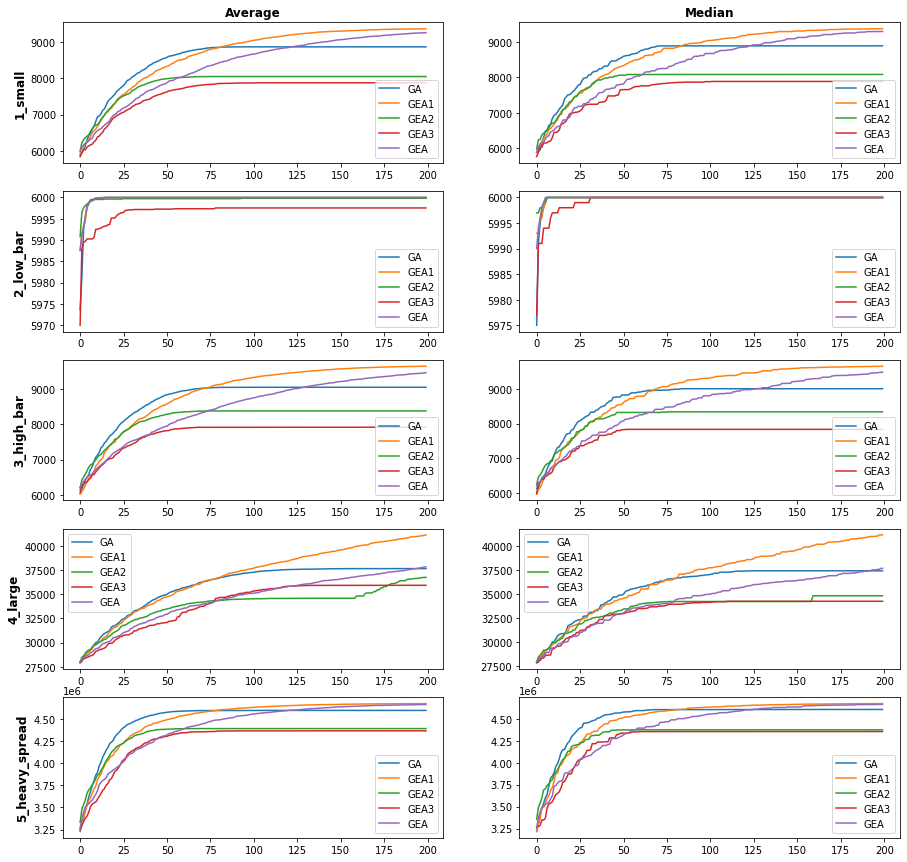

In [10]:
fig, axs = plt.subplots(figsize=(15, 15), nrows=5, ncols=2)
for i in range(5):
    axs[i][0].plot(averages[i].transpose())
    axs[i][0].legend(solverNames)
for i in range(5):
    axs[i][1].plot(medians[i].transpose())
    axs[i][1].legend(solverNames)
for i in range(2):
    axs[0][i].set_title(["Average", "Median"][i], fontweight='bold')
for i in range(5):
    axs[i][0].set_ylabel(testNames[i], size='large', fontweight='bold')
pass

## Conclusion
It appears that guided mutation (GEA1) yields a substantial improvement in results, while the other modifications generally underperform when compared to the original algorithm. Full GEA is better than GA in the long run, but finds the results much slower than both GA and GEA1 and even at its best does not outperform GEA1.
